### Task 1: Introduction to Isolation Forest
**Description**: Install the necessary library and load a sample dataset.

**Steps**:
1. Install scikit-learn
2. Load a sample dataset using Python

In [ ]:
# write your code from here

In [1]:
%pip install scikit-learn
import pandas as pd
from sklearn.datasets import fetch_openml

# Load a sample dataset

# Load the Boston dataset from OpenML
boston = fetch_openml(name='boston', version=1, as_frame=True)
boston_df = boston.frame

# Display the first few rows of the dataset
boston_df.head()

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Task 2: Building an Isolation Forest
**Description**: Initialize an Isolation Forest model and fit it to the Boston dataset.

**Steps**:
1. Initialize Isolation Forest
2. Fit model

In [ ]:
# write your code from here

In [2]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
iso_forest = IsolationForest(random_state=42)

# Fit the model to the dataset (excluding the target column 'MEDV')
iso_forest.fit(boston_df.drop(columns=['MEDV']))

IsolationForest(random_state=42)

### Task 3: Detecting Anomalies
**Description**: Use the fitted Isolation Forest model to predict anomalies.

**Steps**:
1. Predict anomalies
2. Display anomaly counts

In [4]:
# Predict anomalies (-1 indicates anomaly, 1 indicates normal)
anomaly_predictions = iso_forest.predict(boston_df.drop(columns=['MEDV']))

# Display the first few predictions
anomaly_predictions[:10]

array([ 1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

In [ ]:
# write your code from here

In [3]:
# Predict anomalies (-1 indicates anomaly, 1 indicates normal)#

### Task 4: Visualizing Anomalies
**Description**: Visualize the results to see which samples are considered anomalies.

**Steps**:
1. Plot a scatter plot

In [ ]:
# write your code from here

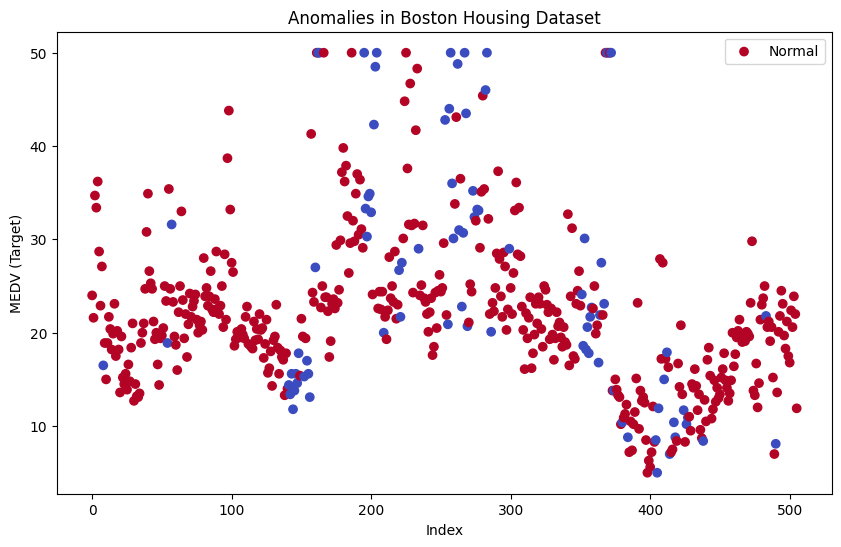

In [5]:
import matplotlib.pyplot as plt

# Add anomaly predictions to the dataset
boston_df['Anomaly'] = anomaly_predictions

# Plot a scatter plot to visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(boston_df.index, boston_df['MEDV'], c=boston_df['Anomaly'], cmap='coolwarm', label='Anomalies')
plt.xlabel('Index')
plt.ylabel('MEDV (Target)')
plt.title('Anomalies in Boston Housing Dataset')
plt.legend(['Normal', 'Anomaly'])
plt.show()

### Task 5: Interpret Contamination Parameter
**Description**: Experiment with different contamination levels.

In [ ]:
# write your code from here

In [6]:
# Count the number of anomalies and normal points
anomaly_counts = boston_df['Anomaly'].value_counts()

# Display the counts
print("Anomaly Counts:")
print(anomaly_counts)

Anomaly Counts:
Anomaly
 1    421
-1     85
Name: count, dtype: int64
